# Week 5 - Data Visualization

(2017-07-29 21:27)

## 5.1. Introduction to Data Visualization

### 5.1.1. Data Visualization

### 5.1.2. Role of Visualization
"The ability to take data - to be able to understand it, to process it, to extract value from it, to visualize it, to communicate it - that's going to be a hugely important skill in the next decades... Because now we really do have essentially free and ubiquitous data."  
\- Hal Varian, Google's Chief Economist  
  
"The representation and presentation of data to facilitate understanding." [Kirk, 2016]  

### 5.1.3. Types of Visualizations
Two key categories:  
* Conceptual od data-driven: Demand-supply curve  
* Declarative or exploratory

### 5.1.4. Key Design Principles

Good data visualization is:  
* Trustworthy  
* Accessible  
* Elegant

### 5.1.5. Visualization Discussion

## 5.2. Matplotlib and Other Libraries

### 5.2.1. Notebooks for Week 5

### 5.2.2. Matplotlib
Why Matplotlib: "It tries to make easy things easy and hard things possible". There are other libraries: Seaborn, ggplot, Altair, Bokeh, Plotly, Folium.

### 5.2.3. World Development Indicators

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Indicators.csv.zip')
data.shape

(5656458, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
# How many unique country names are there?

countries = data['CountryName'].unique().tolist()
len(countries)

247

In [5]:
# Are there same number of country codes?

countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [6]:
# Are there many indicators or few?

indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [7]:
# How many years of data do we have?

years = data['Year'].unique().tolist()
len(years)

56

In [8]:
# What is the range of years?

print(min(years), 'to', max(years))

1960 to 2015


### 5.2.4. Basic Plotting in Matplotlib: Part 1
Let's pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [9]:
# select CO2 emissions for USA
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and Indicator
stage = data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


Let's see how emissions have changed over time using Matplotlib

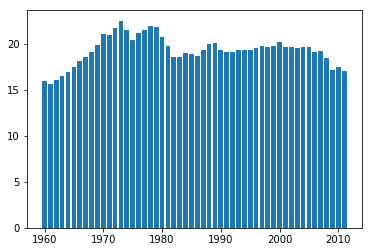

In [10]:
# get years
years = stage['Year'].values
# get values
co2 = stage['Value'].values

# create
plt.bar(years, co2)
plt.show()

Let's make the graphic more appealing

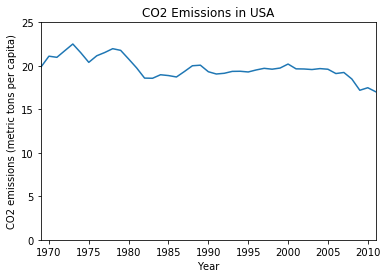

In [11]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emissions in USA')

# to make it more honest, start the y-axis at 0
plt.axis([1969, 2011, 0, 25])

plt.show()

Using histograms to explore the distribution of values

In [12]:
# if you want to just include tose within one s.d.:
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [13]:
len(hist_data)

52

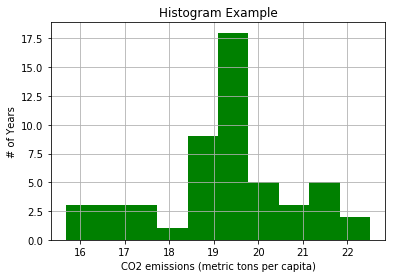

In [14]:
# histogram of the data
plt.hist(hist_data, bins = 10, normed = False, facecolor = 'green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

But how do the USA's numbers relate to those of other countries?

In [15]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [16]:
len(co2_2011)

232

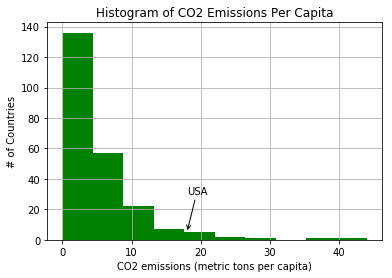

In [17]:
# let's plot a histogram of the emissions per captia by country

# subplots returns a touple with the figure, axis attributes
fig, ax = plt.subplots()

ax.annotate('USA', xy = (18, 5), xycoords = 'data', xytext = (18, 30), textcoords = 'data',
           arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'),)

plt.hist(co2_2011['Value'], 10, normed = False, facecolor = 'green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

plt.grid(True)

plt.show()

### 5.2.5. Basic Plotting in Matplotlib: Part 2
Relationship between GDP and CO2 Emissions in USA

In [18]:
# select GDP per capita emissions for USA
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching USA and GDP
gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


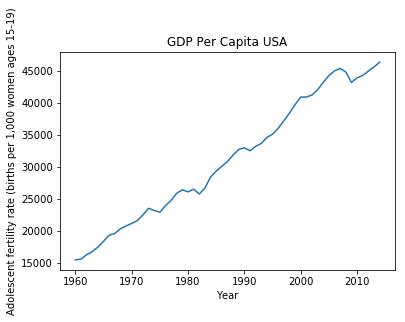

In [19]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(data['IndicatorName'].iloc[0])

# label the figure
plt.title('GDP Per Capita USA')

plt.show()

Scatter plot comparing GDP against CO2 emissions

In [20]:
# make sure we're looking at the same time frames

print('GDP Min Year:', gdp_stage['Year'].min(), ', Max Year:', gdp_stage['Year'].max())
print('CO2 Min Year:', stage['Year'].min(), 'Max Year:', stage['Year'].max())

GDP Min Year: 1960 , Max Year: 2014
CO2 Min Year: 1960 Max Year: 2011


In [21]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


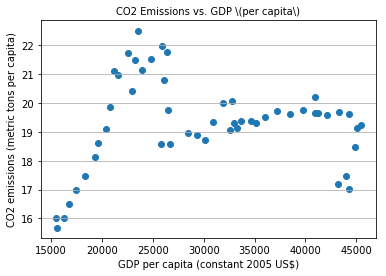

In [22]:
%matplotlib inline

fig, axis = plt.subplots()

# Grid lines, xticks, xlabels, ylabel
axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)', fontsize = 10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize = 10)
axis.set_ylabel(stage['IndicatorName'].iloc[0], fontsize = 10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

In [23]:
np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[ 1.        ,  0.07676005],
       [ 0.07676005,  1.        ]])

A correlationship of 0.07 is pretty weak!

### 5.2.6. Matplotlib Additional Examples
3D plots, bubble plots with color code, boxplots in the additional notebooks.

### 5.2.7 Folium Example
Use Folium library for geographic overlays. JSON data source: https://github.com/python-visualization/folium/raw/master/examples/data/world-countries.json  
  
source: https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json

In [24]:
country_geo = './world-countries.json'

In [25]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [26]:
# pull out CO2 emissions for 2011

hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

# apply our masks
stage = data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [27]:
# create a frame with just the country code and the values we want to plot
plot_data = stage[['CountryCode', 'Value']]
plot_data.head()

,CountryCode,Value
5026275,ARB,4.724500
5026788,CSS,9.692960
5027295,CEB,6.911131
5027870,EAS,5.859548
5028456,EAP,5.302499


In [28]:
# label for the legend
hist_indicator = stage.iloc[0]['IndicatorName']

Visualize CO2 emissions per capita using Folium

In [29]:
# setup a folium map at a high-level zoom @Alok - what is the 100,0
import folium

map = folium.Map(location = [100, 0], zoom_start = 1.5)

In [30]:
# choropleth maps bind Pandas DataFrames and json geometrics
map.choropleth(geo_path = country_geo, data = plot_data,
              columns = ['CountryCode', 'Value'],
              key_on = 'feature.id',
              fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
              legend_name = hist_indicator)

In [31]:
map.save('plot_data.html')

In [32]:
# import the folium interactive html file
from IPython.display import HTML

HTML('<iframe src = plot_data.html width = 900 height = 700> </iframe>')

### 5.2.8. Visualization Libraries
Specific use cases:

    Specialized statistical plots, like automatically fitting a linear regression with confidence interval or like scatter plots color-coded by category.
        seaborn: it builds on top of Matplotlib and it can also be used as a replacement for matplotlib just for an easier way to specify color palettes and plotting aestetics

    Grammar of graphics plotting, if you find the interface of Matplotlib too verbose, Python provides packages based on a different paradigm of plot syntax based on R's ggplot2
        ggplot: it provides similar functionality to Matplotlib and is also based on Matplotlib but provides a different interface.
        altair: it has a simpler interface compared to ggplot and generates Javascript based plots easily embeddable into the Jupyter Notebook or exported as PNG.

    Interactive plots, i.e. pan, zoom that work in the Jupyter Notebooks but also can be exported as Javascript to work standalone on a webpage.
        bokeh: maintained by Continuum Analytics, the company behind Anaconda
        plotly: is both a library and a cloud service where you can store and share your visualizations (it has free/paid accounts)

    Interactive map visualization

    *folium: Creates HTML pages that include the Leaflet.js javascript plotting library to display data on top of maps. *plotly: it supports color-coded country/world maps embedded in the Jupyter Notebook.

    Realtime plots that update with streaming data, even integrated in a dashboard with user interaction.
        bokeh plot server: it is part of Bokeh but requires to launch a separate Python process that takes care of responding to events from User Interface or from streaming data updates.

    3D plots are not easy to interpret, it is worth first consider if a combination of 2D plots could provide a better insight into the data
        mplot3d: Matplotlib tookit for 3D visualization


### 5.2.9. Coding Practice

### 5.2.10. Dataset Discussion

## 5.3. Case Studies

### 5.3.1. Cholera
Cholera is a bacterial infection. It causes severe diarrhea, possibly leading to death by dehydration. It remains a public health threat with 1.3 - 4 million cases and 21 - 143 thousand death worldwide. It spreads by poor sanitation, sewage contaminating water and food supply. John Snow was a london anesthesiologist who discovered how cholera spread.  
  
The Ghost Map - the story of London's most terrifying epidemic, how it changed science, cities, and the modern world - by Steven Johnson.

### 5.3.2. Napoleon's March
Minard's graphic of the French campaign of Russia in 1812.

### 5.3.3. Interactive Visualization World Data

## 5.4. Week 5: Assessment

(2017-07-30 22:15)